# Transient analysis

Study the apparently large number of transients detected by the TS map technique. Especially, how many of the unassociated ones show up in other months.

In [1]:
%matplotlib inline
from uw.like2.analyze import (sourceinfo, transientinfo, associations,)
map( reload, (sourceinfo, transientinfo, associations,))
os.chdir(os.path.expandvars('$FERMI/skymodels/P301_monthly'))

In [2]:
%time ta = transientinfo.Analysis(last=72) # number of months processed

candidate sources: 34104
High latitude (>10 deg) 30720
Associated 2053
CPU times: user 1min 21s, sys: 3.29 s, total: 1min 24s
Wall time: 1min 28s


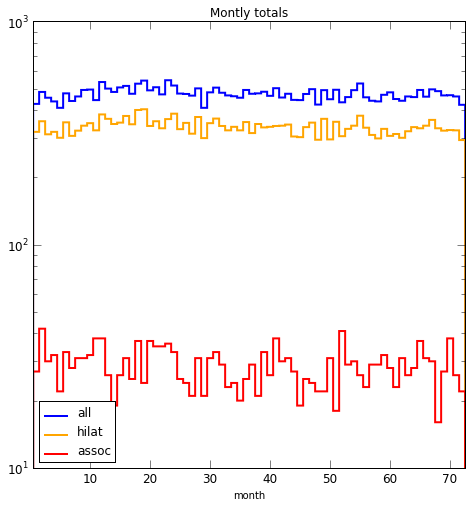

In [3]:
reload(transientinfo)
transientinfo.monthly(ta);

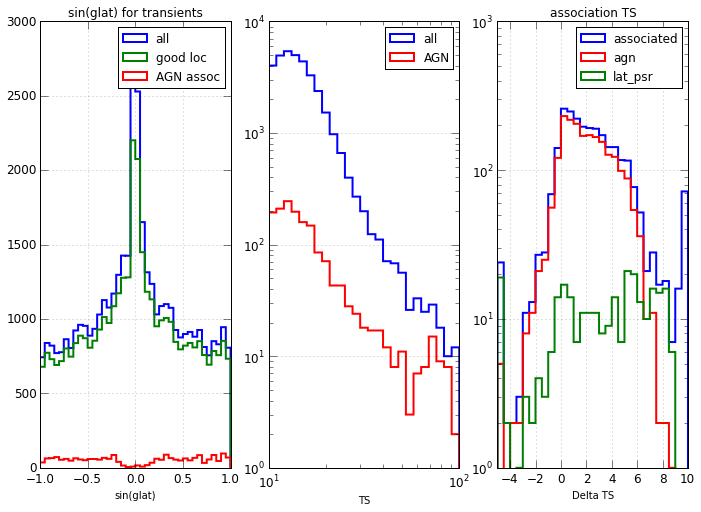

In [4]:
ta.plots();

In [5]:
reload(transientinfo)
alldiffs = transientinfo.pair_correlations(ta, ta.df)
hilat_diffs =transientinfo.pair_correlations(ta, ta.df[ta.hilat]) 
assoc_diffs = transientinfo.pair_correlations(ta, ta.df[ta.assoc])
unassoc = np.logical_not(ta.assoc)
unassoc_diffs =transientinfo.pair_correlations(ta, ta.df[unassoc])

/afs/slac/g/glast/groups/catalog/python/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:1706: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


IndexingError: Unalignable boolean Series key provided

In [ ]:
flg, axx = plt.subplots(1,2, figsize=(12,6))

for bins, ax in zip(
        [np.linspace(0,10,51),np.linspace(0,0.15,31)], axx, ):
    ax.hist(alldiffs**2, bins, label='all',color='blue', lw=2, histtype='step');
    ax.hist(hilat_diffs**2, bins, label='|b|>10',color='orange', lw=2, histtype='step');
    ax.hist(assoc_diffs**2, bins, label='assoc',color='green', lw=2, histtype='step');
    ax.hist(unassoc_diffs**2, bins, label='unassoc',color='red', lw=2, histtype='step');
    ax.grid(True, alpha=0.5)
    plt.setp(ax, xlabel='distance squared [deg**2]', xlim=(0, bins[-1]))
    leg=ax.legend() 
    for box in leg.get_patches():
        box._height=0; box._y=0.5
plt.suptitle('Two-source correlation', size=14);

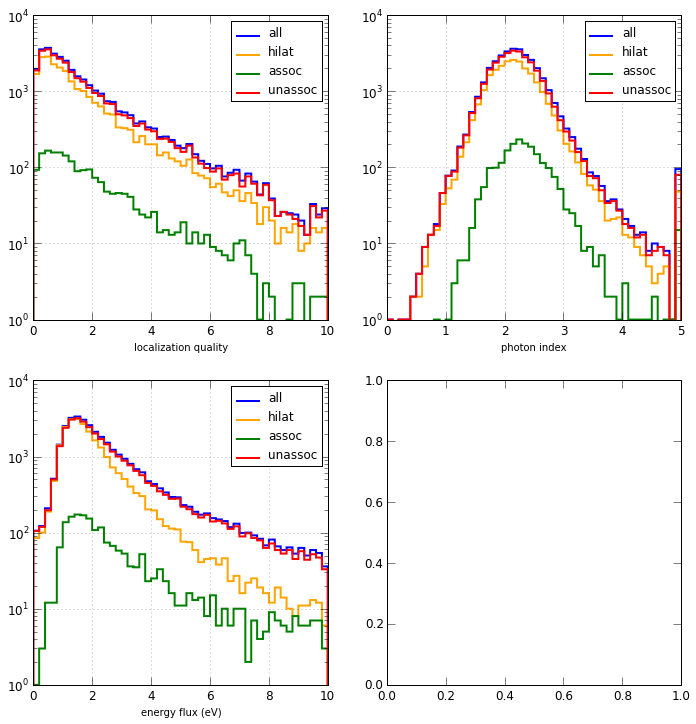

In [6]:
reload(transientinfo)
transientinfo.plots2(ta);

In [ ]:
reload(transientinfo)
transientinfo.cumulative_ts(ta);